<a href="https://colab.research.google.com/github/rokokzk87/Education/blob/main/3_probability_and_statistics_LLN_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
np.random.randint(1,7)

1

In [ ]:
dice = pd.Series([1,2,3,4,5,6])

In [ ]:
dice.mean()

3.5

In [ ]:
np.random.randint(1,7,size=10)

array([6, 6, 1, 6, 4, 2, 6, 2, 4, 4])

In [ ]:
dice.sample(10,replace=True)

2    3
3    4
3    4
1    2
2    3
3    4
5    6
0    1
5    6
2    3
dtype: int64

In [ ]:
dice.mean()

3.5

In [ ]:
dice.sample(4,replace=True).mean()

2.75

In [ ]:
result = []
for n in range(1,1000):
  result.append(dice.sample(n,replace=True).mean())

In [ ]:
result[:10]

[1.0,
 6.0,
 3.3333333333333335,
 4.5,
 2.8,
 4.0,
 2.7142857142857144,
 3.625,
 3.6666666666666665,
 3.9]

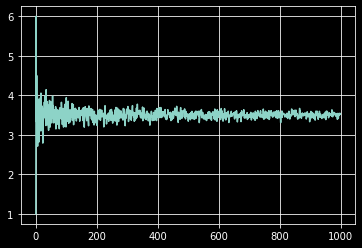

In [ ]:
pd.Series(result).plot(grid=True)

In [ ]:
result = [dice.sample(n,replace=True).mean() for n in range(1,1000)]

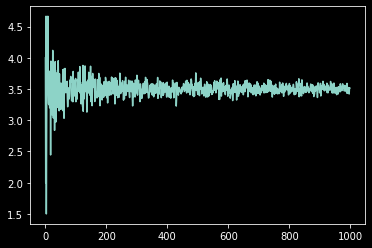

In [ ]:
pd.Series([dice.sample(n,replace=True).mean() for n in range(1,1000)]).plot()

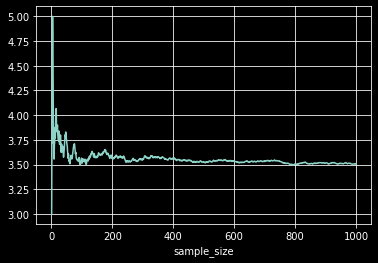

In [ ]:
t = dice.sample(1000,replace=True).to_frame().reset_index(drop=True)
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,1001)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

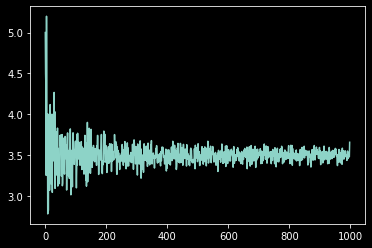

In [ ]:
pd.Series([dice.sample(n,replace=True).mean() for n in range(1,1000)]).plot()

In [ ]:
np.random.normal(size=1000)

array([ 1.29883748e+00,  1.22180043e+00,  9.25990762e-01,  7.74461432e-01,
       -6.20398089e-01,  5.66272024e-01,  5.07446301e-01, -2.98749939e-01,
        1.39170760e+00, -1.92034999e-01, -1.74135102e-01,  7.04693169e-01,
       -5.52383446e-01, -2.12611546e-01,  3.19527951e-03,  5.69809758e-01,
        1.65354652e+00, -5.30571592e-01,  1.20554547e+00,  6.95092954e-01,
        6.23644505e-01,  1.20495661e+00,  4.06114390e-01, -5.98799408e-01,
        2.36685817e-02, -3.88851363e-01,  4.84361419e-01,  3.37490288e-01,
       -5.31185249e-01, -9.12544096e-01, -1.03372032e+00, -1.61962986e-01,
        1.58016099e+00, -3.38363260e-01, -1.00457305e+00, -3.74409856e-01,
       -4.80975896e-01,  2.22829619e-01, -1.66000307e-01, -1.11014844e+00,
        1.69241145e+00, -4.59221402e-01,  1.07175034e+00, -1.64820241e-01,
        1.21028431e+00,  8.94120036e-01,  6.52322770e-01, -3.25172452e-01,
       -3.12678832e-01,  8.59369225e-01,  2.02650503e+00,  4.48403494e-01,
        2.40194731e-01, -

Нормальное

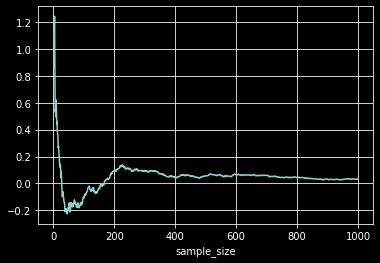

In [ ]:
t = pd.DataFrame(np.random.normal(size=1000))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,1001)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

Равномерное

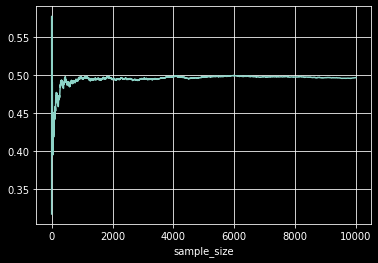

In [ ]:
n = 10000
t = pd.DataFrame(np.random.uniform(size=n))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,n+1)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

Логнормальное

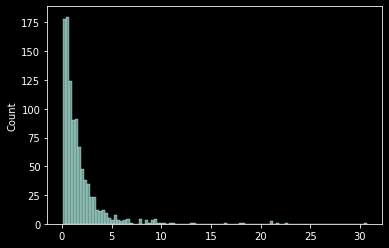

In [ ]:
sns.histplot(np.random.lognormal(size=1000))

In [ ]:
from scipy.stats import lognorm

In [ ]:
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

In [ ]:
mean

array(1.5762648)

In [ ]:
rv = lognorm(s)

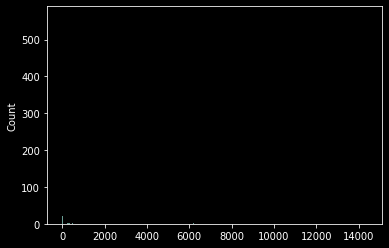

In [ ]:
s = 3
r = lognorm.rvs(s, size=1000)
sns.histplot(r)

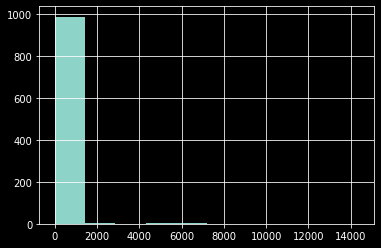

In [ ]:
pd.Series(r).hist()

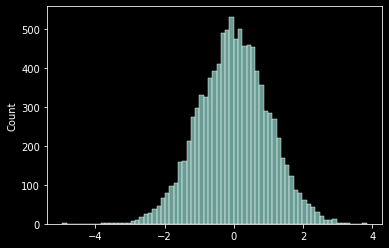

In [ ]:
sns.histplot(np.random.normal(size=10000))

In [ ]:
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

In [ ]:
mean

array(90.0171313)

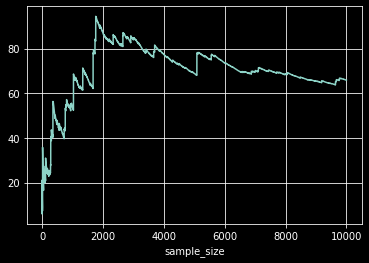

In [ ]:
n = 10000
t = pd.DataFrame(lognorm.rvs(s, size=n))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,n+1)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

In [ ]:
t[0].mean()

81.59386531925607

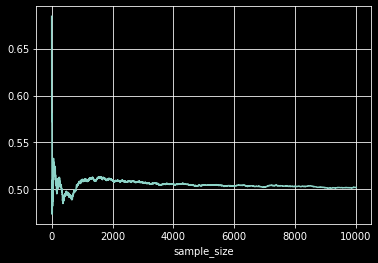

In [ ]:
n = 10000
t = pd.DataFrame(np.random.uniform(size=n))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,n+1)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

Центральная предельная теорема

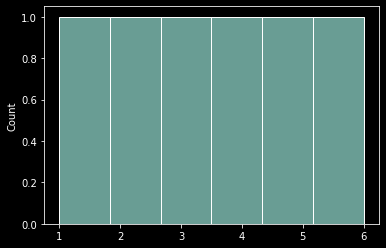

In [ ]:
sns.histplot(dice,bins=6)

In [ ]:
data = [dice.sample(1000,replace=True).mean() for _ in range(10000)]

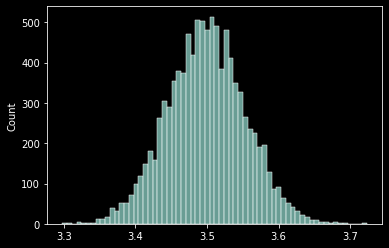

In [ ]:
sns.histplot(data)

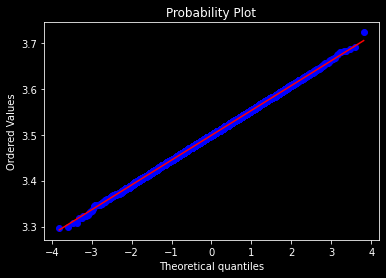

In [ ]:
import pylab 
import scipy.stats as stats

stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

In [ ]:
data = [dice.sample(1000,replace=True).sum() for _ in range(10000)]

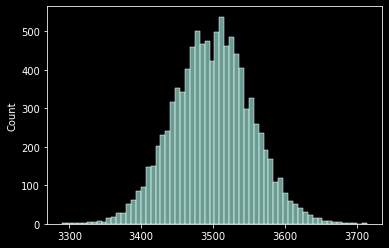

In [ ]:
sns.histplot(data)

In [ ]:
def d():
  return dice.sample(1,replace=True).values[0]

In [ ]:
d()

6

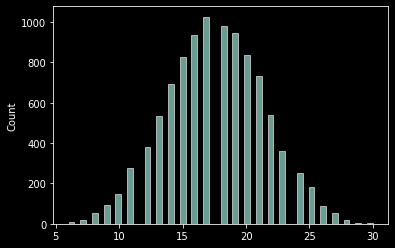

In [ ]:
sns.histplot([d() + d() + d() + d() + d() for _ in range(10000)])

In [ ]:
data = [dice.sample(100,replace=True).mean() for _ in range(10000)]

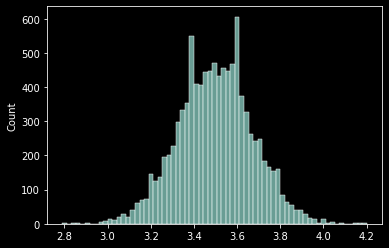

In [ ]:
sns.histplot(data)

In [ ]:
data = [dice.sample(1000,replace=True).mean() for _ in range(10000)]

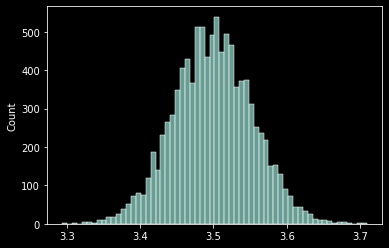

In [ ]:
sns.histplot(data)

Логнормальное

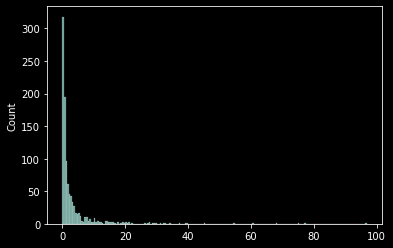

In [ ]:
s = 1.5
r = lognorm.rvs(s, size=1000)
sns.histplot(r)

In [ ]:
data = [lognorm.rvs(s, size=100000).mean() for _ in range(10000)]

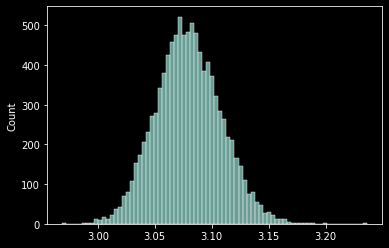

In [ ]:
sns.histplot(data)

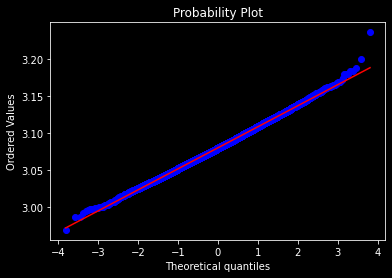

In [ ]:
import pylab 
import scipy.stats as stats

stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

Стандартное отклонение и квадратный корень и n

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for n in tqdm(range(1,100)):
  result.append(pd.Series([dice.sample(n,replace=True).mean() for _ in range(1000)]).std())

  0%|          | 0/99 [00:00<?, ?it/s]

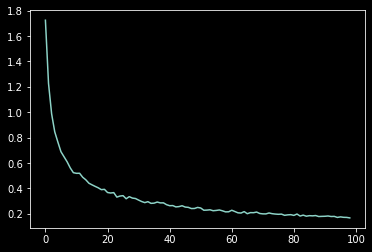

In [ ]:
pd.Series(result).plot()

Это обратно пропорционально квадратному корню из n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


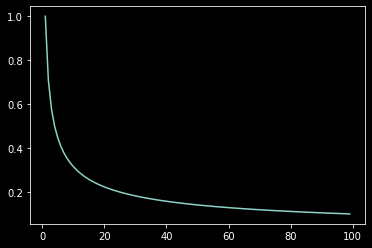

In [ ]:
pd.Series(1/np.sqrt(range(100))).plot()